In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
products = pd.read_csv('amazon_baby.csv')
print(len(products))
products.head()

183531


,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Build the word count vector for each review

In [3]:
tokenizer = RegexpTokenizer(r'\w+')
def count_words(x): return dict(Counter(tokenizer.tokenize(str(x).lower())))
products['word_count'] = products['review'].apply(count_words)
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'faces': 1, 'handles': 1, 'boyfor': 1, 'get':..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'was': 1, 'wise': 1, 'it': 3, 'my': 2, 'plane..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'warmer': 1, 'size': 1, 'would': 1, 'it': 1, ..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'tool': 1, 'rid': 1, 'most': 1, 'ownership': ..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'where': 1, 'soo': 1, 'puppet': 1, 's': 1, 'p..."


## Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [4]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']
print(len(giraffe_reviews))
giraffe_reviews.head()

785


,name,review,rating,word_count
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'parts': 1, 'it': 1, 'great': 1, 'head': 1, '..."
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'water': 1, 'seems': 1, 'easy': 1, 'great': 1..."
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'so': 1, 'repeated': 1, 'by': 1, 'the': 3, 'o..."
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'so': 1, 'ever': 1, 'the': 2, 'out': 1, 'heav..."
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'bjorn': 1, 'whether': 1, 'from': 1, 'some': ..."


## Build a sentiment classifier

In [5]:
#ignore all 3* reviews
products = products[products['rating'] != 3]

#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'was': 1, 'wise': 1, 'it': 3, 'my': 2, 'plane...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'warmer': 1, 'size': 1, 'would': 1, 'it': 1, ...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'tool': 1, 'rid': 1, 'most': 1, 'ownership': ...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'where': 1, 'soo': 1, 'puppet': 1, 's': 1, 'p...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'does': 1, 'product': 1, 'recommend': 1, 'of'...",True


## Let's train the sentiment classifier

In [6]:
train_data, test_data = train_test_split(products, test_size=0.2, random_state=0)

train_data = train_data.dropna()
test_data = test_data.dropna()
vectorizer = CountVectorizer(input='content', max_features=3000, min_df=3, max_df=0.9)
X_train = vectorizer.fit_transform(train_data['review'])
X_test = vectorizer.transform(test_data['review'])

In [7]:
model = linear_model.LogisticRegression(random_state=0)
model.fit(X_train, train_data.sentiment)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0)

## Evaluate the sentiment model

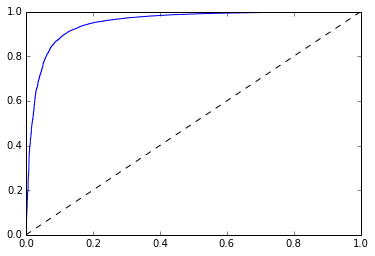

In [8]:
scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(test_data['sentiment'], scores, pos_label=1)

plt.figure()
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## Applying the learned model to understand sentiment for Giraffe

In [9]:
giraffe_reviews = giraffe_reviews.dropna()
X_giraffe_test = vectorizer.transform(giraffe_reviews['review'])
giraffe_reviews['predicted_sentiment'] = model.predict_proba(X_giraffe_test)[:,1]
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'parts': 1, 'it': 1, 'great': 1, 'head': 1, '...",0.998298
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'water': 1, 'seems': 1, 'easy': 1, 'great': 1...",0.998764
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'so': 1, 'repeated': 1, 'by': 1, 'the': 3, 'o...",0.517441
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'so': 1, 'ever': 1, 'the': 2, 'out': 1, 'heav...",0.958759
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'bjorn': 1, 'whether': 1, 'from': 1, 'some': ...",0.242988


## Most positive reviews for the giraffe

In [11]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)
giraffe_reviews.head()


,name,review,rating,word_count,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{'nose': 1, 'mouths': 2, 'violet': 7, 'emanate...",1
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{'so': 1, 'things': 2, 'come': 1, 'does': 1, '...",1
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{'interested': 1, 'so': 1, 'whether': 1, 'come...",1
34938,Vulli Sophie the Giraffe Teether,My nephews and my four kids all had Sophie in ...,5,"{'s': 4, 'places': 1, 'great': 1, 'grip': 1, '...",1
34523,Vulli Sophie the Giraffe Teether,"I admit, I didn\'t get Sophie the Giraffe at f...",4,"{'body': 1, 'well': 1, 'so': 1, 'get': 4, 'hav...",1


## Show most negative reviews for giraffe

In [12]:
giraffe_reviews.tail()

,name,review,rating,word_count,predicted_sentiment
34748,Vulli Sophie the Giraffe Teether,"My daughter loves Sophie, but we received her ...",2,"{'legs': 2, 'upon': 1, 'from': 2, 'hazard': 1,...",0.000502
34860,Vulli Sophie the Giraffe Teether,This children\'s toy is nostalgic and very cut...,1,"{'was': 3, 's': 1, 'by': 1, 'is': 6, 'does': 1...",0.000336
34824,Vulli Sophie the Giraffe Teether,I got one of these as a showe gift that my bab...,1,"{'most': 1, 'so': 2, 'from': 3, 'higher': 1, '...",0.000257
34732,Vulli Sophie the Giraffe Teether,Received the product and smells like cheap rub...,1,"{'biggest': 1, 'received': 1, 'it': 1, 'the': ...",0.000095
34687,Vulli Sophie the Giraffe Teether,I wanted to love this product and was excited ...,1,"{'was': 4, 'so': 2, 'around': 1, 'we': 1, 'cer...",0.000001
